# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

# Задание

Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет  
Шаг 2. Подготовьте данные
Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
  
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
Шаг 3. Проведите исследовательский анализ данных
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?
Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.
Шаг 6. Напишите общий вывод

# 1. Подготовка данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import levene

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Заменила названия столбцов, привела к нижнему регистру.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходя из полученной информации видна необходимость поменять тип данных в столбцах "year_of_release" и "user_score".

In [5]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [6]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [8]:
data['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [9]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [11]:
data['critic_score'] = data['critic_score'].astype(float)

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
data['rating'] = data['rating'].fillna('без рейтинга')

Оставила пропуски в year_of_release , critic_score и user_score  из опасения испортить данные и повлиять на статистику

Пропуски могли пояится по разным причинам: не знают жанр, не знают год релиза, неизвестен рейтинг или игре не присваивалась оценка,возможно, технические ошибки.

В оценке пользователей есть буквенное обозначение tbd. Согласно запросу в гугле, это расшифровывается как To Be Determined, то есть Будет определено. Следовательно, практически то же самое, что и "неизвестно", думаю, что отзывов просто не было.
Можно заменить.

In [15]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [16]:
data['user_score'] = data['user_score'].astype(float)

In [17]:
data.duplicated().sum()

0

Нет дубликатов, это хорошо

In [102]:
data_dup = data[data.duplicated(subset=['name', 'platform'])==True]
data_dup

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.00,NaN,NaN,без рейтинга
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [103]:
data[data['name']=='Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,без рейтинга
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,без рейтинга
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,без рейтинга
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Посмотрела по Need for Speed, нашла по 2 раза на PC и X360, но у них разные годы релиза, притом не 1 год разницы, что можно было бы счесть ошибкой, а по 7. Больше похоже на переиздание. Оставлю все же так и не буду трогать.

По заданию нужно посчитать суммарные продажи во всех регионах

In [104]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [105]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,без рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,без рейтинга,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,без рейтинга,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,без рейтинга,28.31


Вывод по предобработке: унифицировала столбцы, заменила Tbd на nan оценках пользователей, заменила тип данных году релиза, добавила новый столбец по суммарным продажам.

# 2. Исследовательский анализ данных

*1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?*

Text(0.5, 0, 'Год')

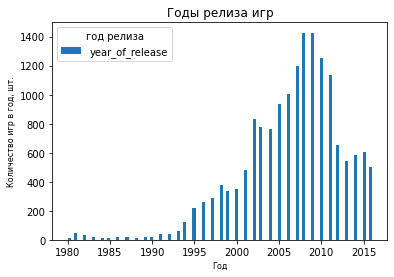

In [106]:
game_in_year = data['year_of_release'].plot(kind='hist', bins=100).legend()
game_in_year.set_title('год релиза')
plt.title('Годы релиза игр', fontsize = 12) # заголовок
plt.ylabel('Количество игр в год, шт.', fontsize = 8)  # подписываем ось y
plt.xlabel('Год', fontsize = 8) # подписываем ось x

До 90х игр было очень мало, но с 1994 г. начинается устойчивый рос количества выпускаемых игр. Вероятно, на это повлияло развитие компьютерной техники, а также приставок. Такой рост продолжался до 2008 г., продержался на том же уровне в 2009 г., и с 2010 начался спад, что в свою очередь, вероятно, связано с развитием смартфонов и индустрии мобильных игр.
Таким образом, отвечая на поставленный вопрос, думаю, что количество игр до 1990 г. можно считать нерелевантным и эти данные не очень важны.

*2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?*

In [107]:
data_cut = data[data['year_of_release']>=1994]

Тк в предыдущем пункте было определено, что рост игр начался с 1994 г., я подумала, что стоит выкинуть предыдущие годы.

In [108]:
#посмотрим топ платформ по продажам (выведем в порядке уменьшения)
most_sum_sale = data_cut.pivot_table(
index='platform',
values=['total_sales'],
aggfunc={'total_sales':'sum'}
).sort_values(by='total_sales',ascending=False)

In [109]:
most_sum_sale

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Посмотрим эту табличку на графике

Text(0, 0.5, 'Продажи')

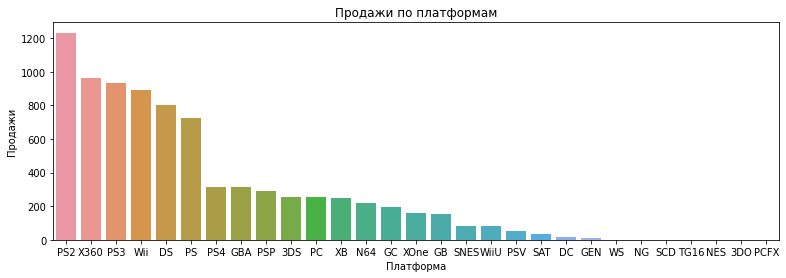

In [110]:
most_sum_sale = data_cut.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(13,4))
sns.barplot(x=most_sum_sale.index,y=most_sum_sale['total_sales'])
plt.title("Продажи по платформам")
plt.xlabel("Платформа")
plt.ylabel("Продажи")

Собственно, график подтверждает табличку и также показывает, что самые популярные (читай "продаваемые") платформы - PS2, X360, PS3, Wii, DS	и PS. Конечно, обычно топ выводится кратным 5, однако на данном графике так явно напрашивается 6, что я решила оставить топ-6.	

Посмотрим срок службы платформ из топ-6

Text(0, 0.5, 'platform')

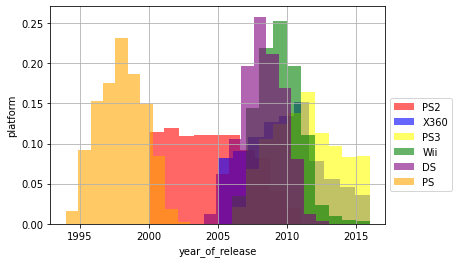

In [111]:
data_cut.loc[data_cut['platform'] == 'PS2','year_of_release'].hist(bins=10, alpha=0.6, color='red', label='PS2', density=True)
data_cut.loc[data_cut['platform'] == 'X360','year_of_release'].hist(bins=10, alpha=0.6, color='blue', label='X360', density=True)
data_cut.loc[data_cut['platform'] == 'PS3','year_of_release'].hist(bins=10, alpha=0.6, color='yellow', label='PS3', density=True)
data_cut.loc[data_cut['platform'] == 'Wii','year_of_release'].hist(bins=10, alpha=0.6, color='green', label='Wii', density=True)
data_cut.loc[data_cut['platform'] == 'DS','year_of_release'].hist(bins=10, alpha=0.6, color='purple', label='DS', density=True)
data_cut.loc[data_cut['platform'] == 'PS','year_of_release'].hist(bins=10, alpha=0.6, color='orange', label='PS', density=True)
plt.legend(bbox_to_anchor=(1, 0.6))

plt.xlabel('year_of_release')
plt.ylabel('platform')

Срок жизни платформ:

PS2 - 2000-2011 - 11 лет;
X360 - 2005-2016 - 11 лет;
PS3 - 2006-2016 - 10 лет;
Wii - 2006-2016 - 10 лет;
DS - 2004-2013 - 9 лет;
PS - 1994-2003 - 9 лет.

Средний срок жизни платформ из топ-6 равен 10 годам. 
Предположу, что это и можно считать характерным сроком, за который появляются новые и исчезают старые платформы.

*3.Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.*

Для начала необходимо определить актуальный период. Вроде логично предположить, что раз срок жизни платформы равен 10 годам, то последние 10 лет, с 2006 г., и можно считать актуальным периодом. Однако вспоминая, что в 2008-2009 гг. был пик по количеству выпускаемых игр, и понимая, что в 2017 г. подобные значения достигнуты не будут, будем в принципе рассматривать период после 2010 г., когда начался резкий спад. При этом, как стало известно, дл игровой индустрии период более 4х лет - это много. И если нам нужен прогноз на 2017 г., то за вычетом 4х лет, это 2013 г., однако с учетом того, что некоторые платформы закончились в 2013, возьмем период с 2014 г.

In [112]:
#создам новый датафрейм с совсем-совсем акатуальными данными
data_cut_2014 = data_cut[data_cut['year_of_release'] > 2014]

In [113]:
#посмотрим продажи по платформам
most_sum_sale = data_cut_2014.groupby('platform').agg({'total_sales': 'sum'}).reset_index()
most_sum_sale.sort_values(by='total_sales', ascending=False).head(10)

,platform,total_sales
3,PS4,188.15
9,XOne,86.29
0,3DS,42.92
7,WiiU,20.95
2,PS3,20.42
1,PC,13.77
8,X360,13.48
5,PSV,10.50
6,Wii,1.32
4,PSP,0.12


PS4, XOne, 3DS, WiiU, PS3 - наиболее продаваемые платформы после 2014 г. Падают продажи у Wii и PSP.

Попробуем выбрать из них наиболее потенциально прибыльные к 2017 г.

Text(0, 0.5, 'PS4')

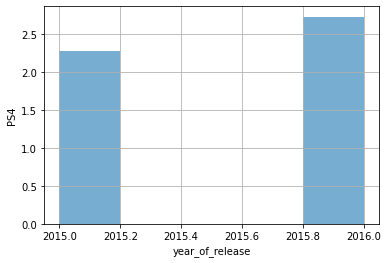

In [114]:
#Хочу посмотреть, как выглядят на графике актуальные с 2014 года платформы
data_cut_2014.loc[data_cut_2014["platform"] == "PS4", "year_of_release"].hist(
    bins=5, alpha=0.6, label="PS4", density=True
)
plt.xlabel("year_of_release")
plt.ylabel("PS4")

Text(0, 0.5, 'XOne')

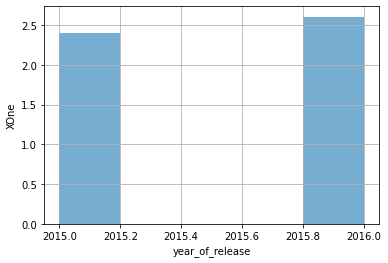

In [115]:
data_cut_2014.loc[data_cut_2014["platform"] == "XOne", "year_of_release"].hist(
    bins=5, alpha=0.6, label="XOne", density=True
)
plt.xlabel("year_of_release")
plt.ylabel("XOne")

Text(0, 0.5, '3DS')

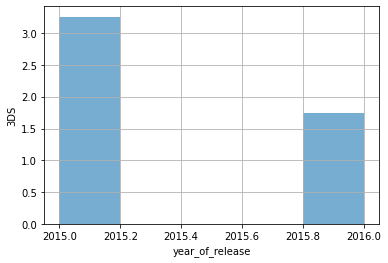

In [116]:
data_cut_2014.loc[data_cut_2014["platform"] == "3DS", "year_of_release"].hist(
    bins=5, alpha=0.6, label="3DS", density=True
)
plt.xlabel("year_of_release")
plt.ylabel("3DS")

Text(0, 0.5, 'WiiU')

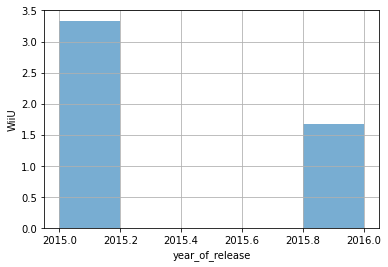

In [117]:
data_cut_2014.loc[data_cut_2014["platform"] == "WiiU", "year_of_release"].hist(
    bins=5, alpha=0.6, label="WiiU", density=True
)
plt.xlabel("year_of_release")
plt.ylabel("WiiU")

Text(0, 0.5, 'PS3')

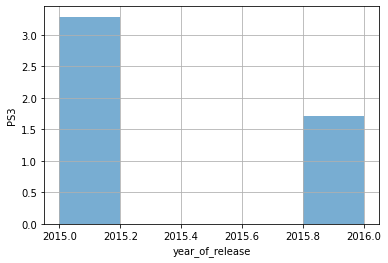

In [118]:
data_cut_2014.loc[data_cut_2014["platform"] == "PS3", "year_of_release"].hist(
    bins=5, alpha=0.6, label="PS3", density=True
)
plt.xlabel("year_of_release")
plt.ylabel("PS3")

Согласно эти графикам, у платформ  PS4 и XOne растет спрос, у остальны - падает.

*Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.*

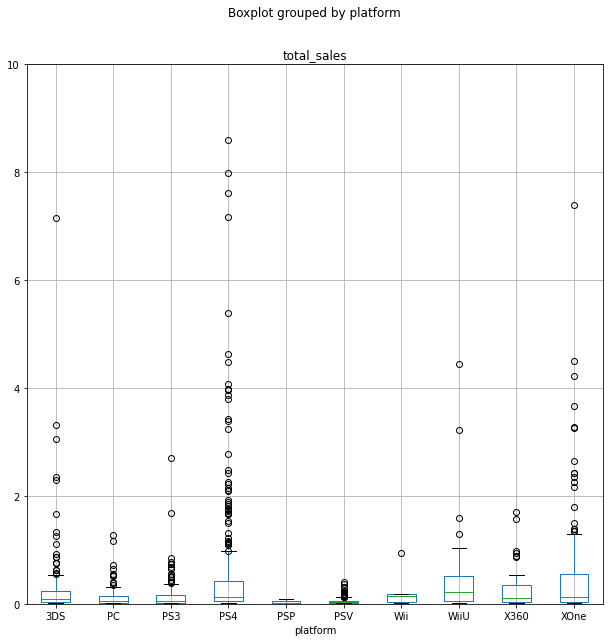

In [119]:
plot = data_cut_2014.boxplot('total_sales',by='platform', figsize=(10,10)).set_ylim(0, 10)

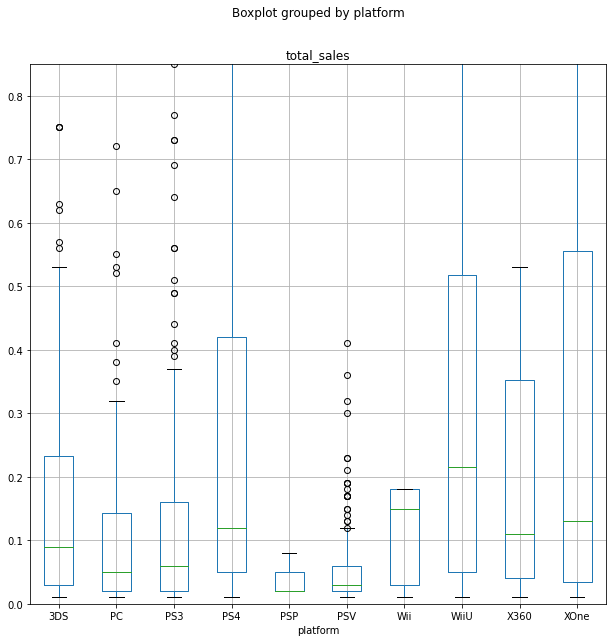

In [120]:
plot = data_cut_2014.boxplot('total_sales',by='platform', figsize=(10,10)).set_ylim(0, 0.85)

На диаграмме выделяются 5 платформ по максимальным показателям: WiiU, Wii, XOne, PS4, X360.

*Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.*

Для рассмотрения выбрана платформа PS4, как та, у которой предположительно будет расти спрос и дальше и которая на слуху.

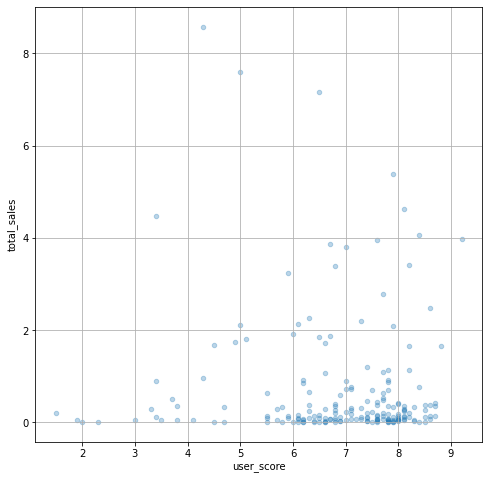

In [121]:
#посмотрим отзывы пользователей
data_cut_2014[data_cut_2014["platform"] == "PS4"].plot(
    x="user_score",
    y="total_sales",
    kind="scatter",
    alpha=0.3,
    figsize=(8, 8),
    grid=True,
)
plt.show()

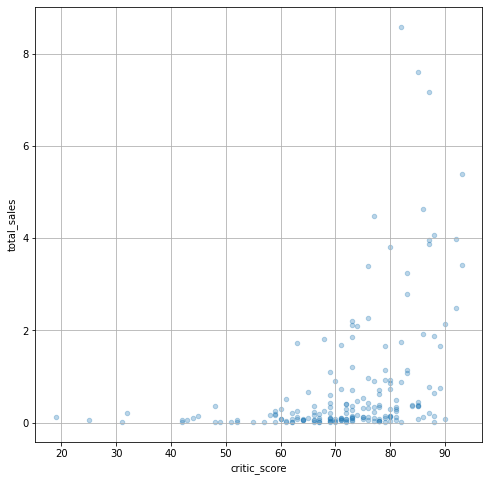

In [122]:
#и отзывы критиков
data_cut_2014[data_cut_2014["platform"] == "PS4"].plot(
    x="critic_score",
    y="total_sales",
    kind="scatter",
    alpha=0.3,
    figsize=(8, 8),
    grid=True,
)
plt.show()

In [123]:
# вычислим корреляционную матрицу
ps4_sales = data_cut_2014[data_cut_2014['platform']=='PS4']
ps4_sales['user_score'].corr(ps4_sales['total_sales'])

-0.05973845712638215

Корреляция слабая отрицательная

In [124]:
ps4_sales = data_cut_2014[data_cut_2014['platform']=='PS4']
ps4_sales['critic_score'].corr(ps4_sales['total_sales'])

0.3928485555130601

Корреляция слабая положительная

Большую часть составляют высокие оценки. По данным диаграммы рассеивания по отзывам покупателей слабо отрицательная корреляция и слабо положительная корреляция по отзывам критиков. Предположу, что оценки других пользователей неважны совсем, а оценки критиков имеют некоторый вес для юзеров. 

*Соотнесите выводы с продажами игр на других платформах.*

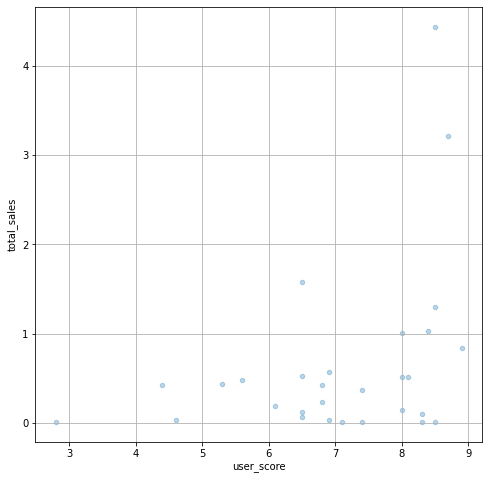

In [125]:
#посмотрим по другим популярным платформам:WiiU
#отзывы пользователей
data_cut_2014[data_cut_2014["platform"] == "WiiU"].plot(
    x="user_score",
    y="total_sales",
    kind="scatter",
    alpha=0.3,
    figsize=(8, 8),
    grid=True,
)
plt.show()

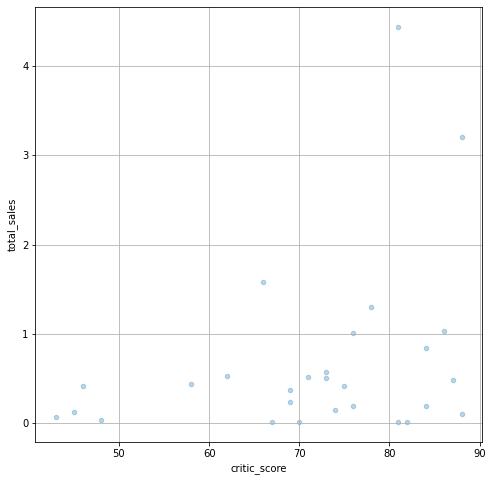

In [126]:
#отзывы критиков
data_cut_2014[data_cut_2014["platform"] == "WiiU"].plot(
    x="critic_score",
    y="total_sales",
    kind="scatter",
    alpha=0.3,
    figsize=(8, 8),
    grid=True,
)
plt.show()

In [127]:
# вычислим корреляционную матрицу
wiiu_sales = data_cut_2014[data_cut_2014['platform']=='WiiU']
wiiu_sales['user_score'].corr(wiiu_sales['total_sales'])

0.3635185724809445

In [128]:
wiiu_sales = data_cut_2014[data_cut_2014['platform']=='WiiU']
wiiu_sales['critic_score'].corr(wiiu_sales['total_sales'])

0.317045711769622

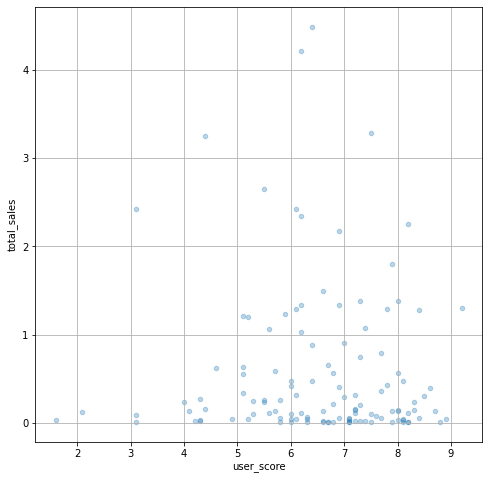

In [129]:
#и XOne
#отзывы пользователей
data_cut_2014[data_cut_2014["platform"] == "XOne"].plot(
    x="user_score",
    y="total_sales",
    kind="scatter",
    alpha=0.3,
    figsize=(8, 8),
    grid=True,
)
plt.show()

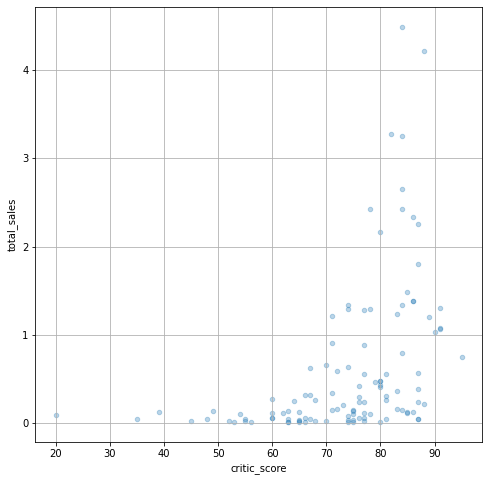

In [130]:
#отзывы критиков
data_cut_2014[data_cut_2014["platform"] == "XOne"].plot(
    x="critic_score",
    y="total_sales",
    kind="scatter",
    alpha=0.3,
    figsize=(8, 8),
    grid=True,
)
plt.show()

In [131]:
# вычислим корреляционную матрицу
xone_sales = data_cut_2014[data_cut_2014['platform']=='XOne']
xone_sales['user_score'].corr(xone_sales['total_sales'])

-0.04146733387366271

In [132]:
xone_sales = data_cut_2014[data_cut_2014['platform']=='XOne']
xone_sales['critic_score'].corr(xone_sales['total_sales'])

0.43088874582136805

В целом, для платформы XOne по отзывам покупателей слабо отрицательная корреляция и слабо положительная корреляция по отзывам критиков, что совпадает с PS4, то есть оценки других пользователей неважны совсем, а оценки критиков имеют некоторый вес для юзеров. Однако для платформы WiiU обе корреляции слабо положительные, получается, некоторое значение все же имеют. Предположу, что это может быть связано с популярностью и известностью платформ, и люди просто их хотят несмотря ни на что, а с менее известными есть сомнения.

In [133]:
data_cut_2014.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PC,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
PSP,3.0,0.040000,0.034641,0.02,0.020,0.020,0.0500,0.08
PSV,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41
Wii,5.0,0.264000,0.390487,0.01,0.030,0.150,0.1800,0.95
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
X360,48.0,0.280833,0.381207,0.01,0.040,0.110,0.3525,1.70


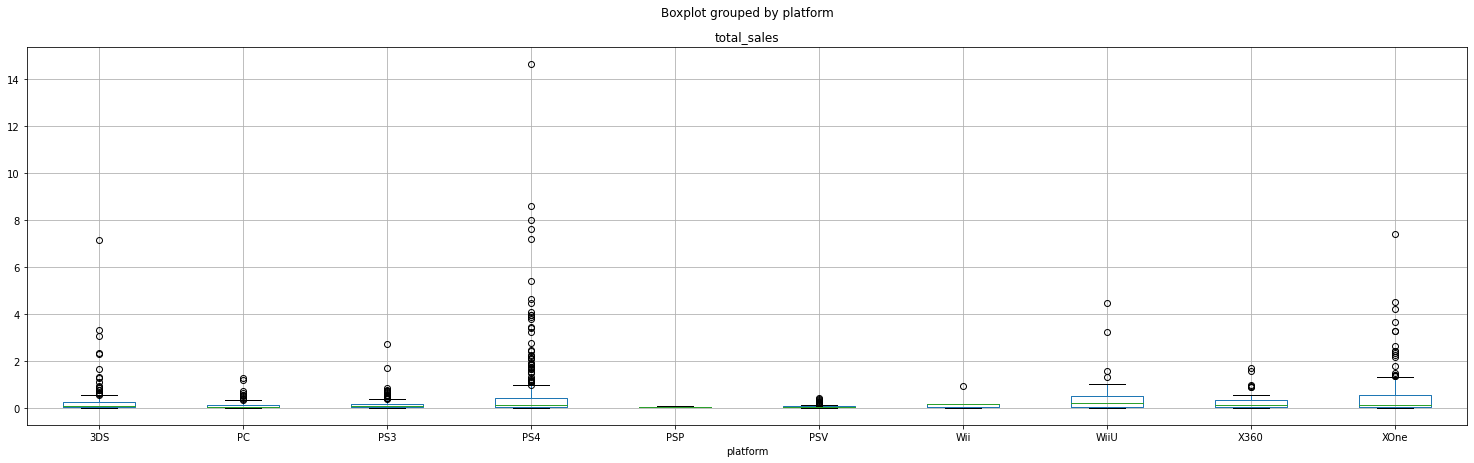

In [134]:
data_cut_2014.boxplot(column='total_sales', by='platform', figsize=(25,7))
plt.show()

Есть выброс до 15 млн, видимо, популярная игра, и несколько в промежутке 6-9 млн, для статистики не имеющие особого значения.

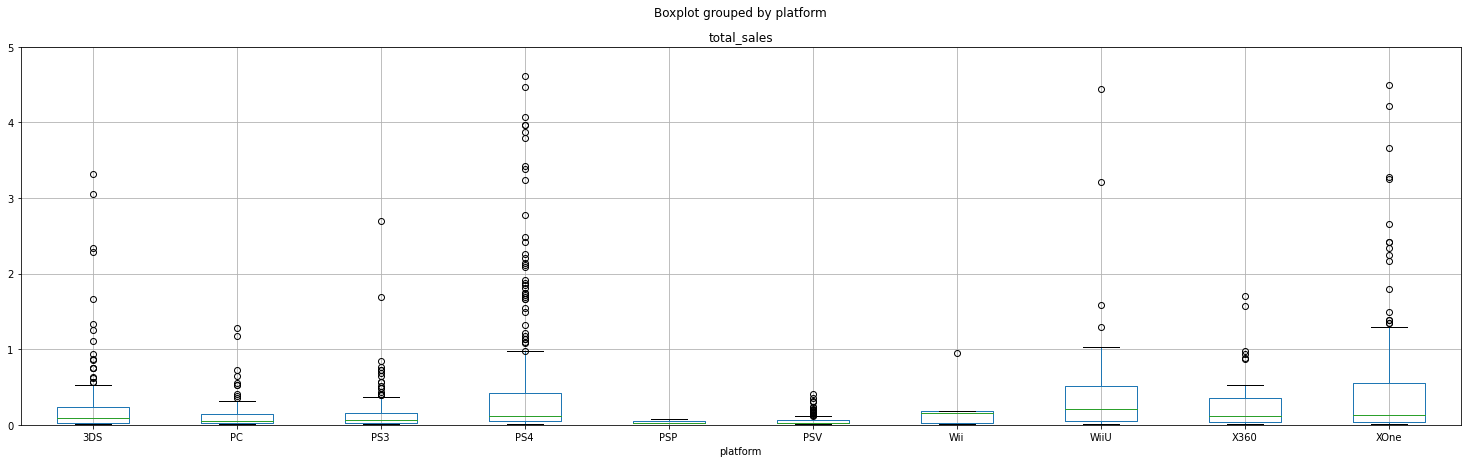

In [135]:
#судя по всему, можно смело уменьшать до 5 млн продаж
data_cut_2014.boxplot(column='total_sales', by='platform', figsize=(25,7))
plt.ylim(0, 5)
plt.show()

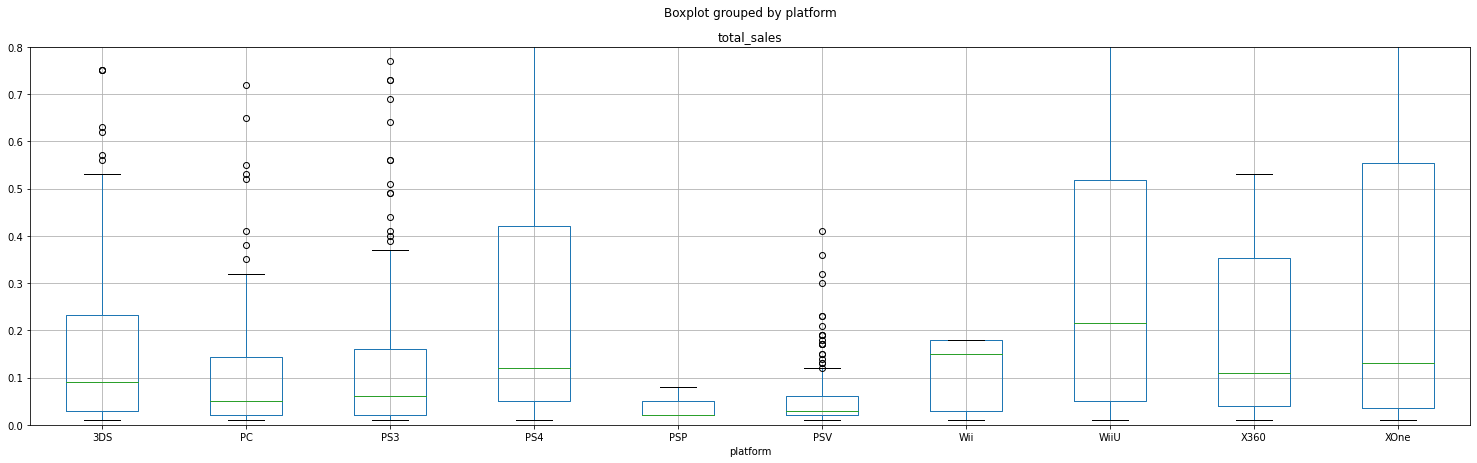

In [136]:
#и даже до 800 тыс продаж
data_cut_2014.boxplot(column='total_sales', by='platform', figsize=(25,7))
plt.ylim(0, 0.8)
plt.show()

Вывод: лучше всего продавался WiiU - у него наивысшая медиана, за ним следуют XOne и PS4. Также можно заметить, что у многих платформ есть выбросы.

*Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?*

In [137]:
# посмотрим популярность жанров на всех платформах за все время
x=data_cut_2014.groupby("genre")['genre'].count()
genres = x.index

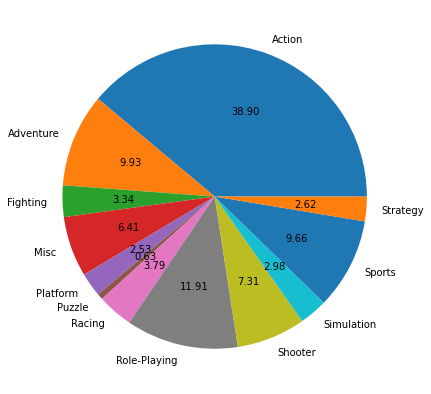

In [138]:
plt.figure(figsize=(20,7))
plt.pie(x=x, labels=genres, autopct="%.2f")
plt.show()

Выделю топ-5. Больше всего игр в жанре "Action", затем в "Role-Playing", "Adventure", "Sports" и "Shooter". Наименее популярны игры в жанре "Puzzle".

In [139]:
data_cut_2014.groupby("genre")[["total_sales"]].sum().sort_values(
    "total_sales", ascending=False
).style.bar()

,total_sales
genre,
Shooter,105.730000
Action,102.130000
Sports,64.330000
Role-Playing,55.820000
Misc,14.170000
Fighting,12.370000
Adventure,11.980000
Racing,10.860000
Platform,9.280000


Чаще всего покупаются игры в жанре "Shooter", который входить и топ-5 по популярности.
На втором месте игры в жанре "Action".
На третьем месте игры в жанре "Sports".
На четвертом "Role-Playing", замыкает этот топ "Misc".

Попробую сравнить с медианным значением.

In [140]:
data_cut_2014.groupby("genre")[["total_sales"]].median().sort_values(
    "total_sales", ascending=False
).style.bar()

,total_sales
genre,
Shooter,0.380000
Sports,0.120000
Role-Playing,0.115000
Platform,0.100000
Simulation,0.100000
Fighting,0.090000
Action,0.060000
Misc,0.060000
Racing,0.055000


В медиане топ-1 также Шутеры, однако далее идут Спортивные, ролевые, платформы и симуляторы, тем самым значительно отличаясь от предыдущих результатов.

Подведем небольшой итог: с 1994 г. начинается устойчивый рос количества выпускаемых игр. Вероятно, на это повлияло развитие компьютерной техники, а также приставок. Такой рост продолжался до 2008 г., продержался на том же уровне в 2009 г., и с 2010 начался спад, что в свою очередь, вероятно, связано с развитием смартфонов и индустрии мобильных игр. В современное время, после 2014 г., наиболее продаваемые платформы это - PS4, XOne, 3DS, WiiU, PS3, средняя жизнь платформы - 10 лет. Предположительно, в 2017 г. самыми "выстреливающими" платформами окажутся PS4 и XOne, т.к. на них растет спрос.
Отметим, что при покупке, пользователи больше доверяют мнению критиков, чем таких же юзеров, как они сами, хотя в целом это особо не влияет.
Самый популярный жанр - "Shooter", наименее популярны игры в жанре "Puzzle".

# 3. Портрет пользователя каждого региона.

*Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?*

In [141]:
na_platform = (
    data_cut_2014.pivot_table(index="platform", values="na_sales", aggfunc="sum")
    .sort_values(by="na_sales", ascending=False)
    .head(5)
)

In [142]:
eu_platform = (
    data_cut_2014.pivot_table(index="platform", values="eu_sales", aggfunc="sum")
    .sort_values(by="eu_sales", ascending=False)
    .head(5)
)

In [143]:
jp_platform = (
    data_cut_2014.pivot_table(index="platform", values="jp_sales", aggfunc="sum")
    .sort_values(by="jp_sales", ascending=False)
    .head(5)
)

In [144]:
na_genre = data_cut_2014.pivot_table(index='genre', values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)
eu_genre = data_cut_2014.pivot_table(index='genre', values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
jp_genre = data_cut_2014.pivot_table(index='genre', values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)

na_rating = data_cut_2014.pivot_table(index='rating',values='na_sales',aggfunc='sum')
eu_rating = data_cut_2014.pivot_table(index='rating',values='eu_sales',aggfunc='sum')
jp_rating = data_cut_2014.pivot_table(index='rating',values='jp_sales',aggfunc='sum')

In [145]:
top_5_platform = na_platform.merge(eu_platform,on='platform',how='outer')
top_5_platform = top_5_platform.merge(jp_platform,on='platform',how='outer')

top_5_genre = na_genre.merge(eu_genre,on='genre',how='outer')
top_5_genre = top_5_genre.merge(jp_genre,on='genre',how='outer')

rating = na_rating.merge(eu_rating,on='rating',how='outer')
rating = rating.merge(jp_rating,on='rating',how='outer')

In [146]:
display(top_5_platform)

display(top_5_genre)

rating

,na_sales,eu_sales,jp_sales
platform,,,
PS4,63.86,83.54,12.05
XOne,50.30,28.10,NaN
3DS,10.31,7.39,23.55
WiiU,8.86,NaN,4.12
X360,8.05,NaN,NaN
PC,NaN,9.10,NaN
PS3,NaN,7.30,4.97
PSV,NaN,NaN,8.41


,na_sales,eu_sales,jp_sales
genre,,,
Shooter,48.18,40.28,3.79
Action,33.68,34.82,23.05
Sports,26.31,27.82,NaN
Role-Playing,19.82,17.21,13.41
Misc,5.58,NaN,3.19
Racing,NaN,6.52,NaN
Adventure,NaN,NaN,2.22


,na_sales,eu_sales,jp_sales
rating,,,
E,26.59,34.83,5.25
E10+,17.87,11.54,3.27
M,47.03,45.54,4.29
T,22.86,20.32,7.70
без рейтинга,37.44,35.71,32.89


Пропуски NaN говорят о том, что та или иная платформа или жанр в различных регионах не прижились.

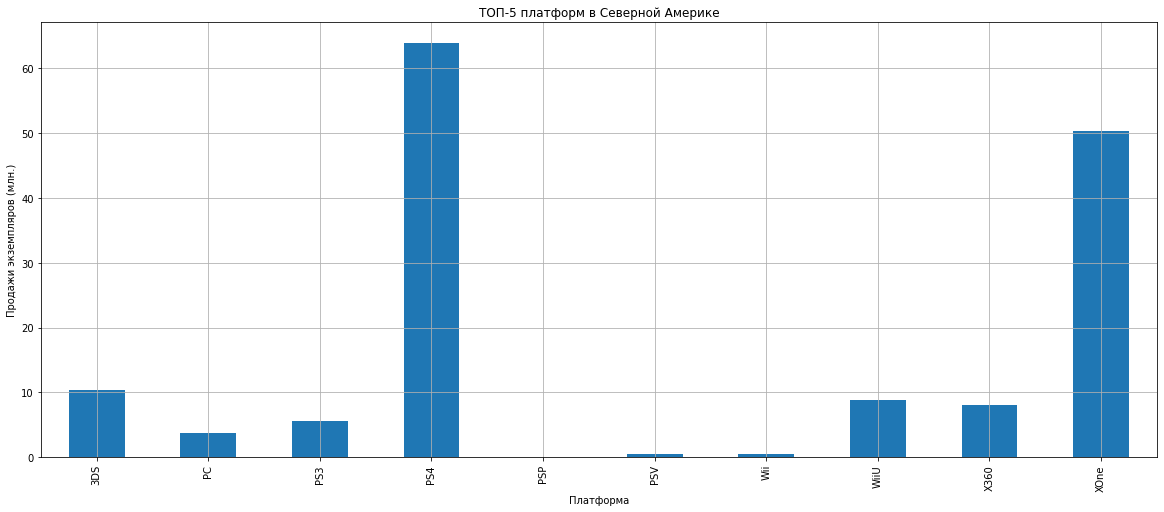

In [147]:
# ТОП-5 платформ в Северной Америке 
platform_na = data_cut_2014.groupby("platform")["na_sales"].sum()
platform_na.plot(
    x="platform",
    y="na_sales",
    kind="bar",
    figsize=(20, 8),
    grid=True,
    title="ТОП-5 платформ в Северной Америке",
)
plt.xlabel("Платформа")
plt.ylabel("Продажи экземпляров (млн.)")
plt.show()

Топ-5 платформ в Северной Америке - PS4, XOne, 3DS, WiiU и X360.

In [148]:
#переменная platform_all - сумма общих продаж по всем платформам
platform_all = data_cut_2014.groupby('platform')['total_sales'].sum()
share_na = platform_na / platform_all * 100
display('Доля продаж в Северной Америке')
display(share_na.sort_values(ascending=False))

'Доля продаж в Северной Америке'

platform
X360    59.718101
XOne    58.291807
WiiU    42.291169
Wii     37.121212
PS4     33.941005
PS3     27.717924
PC      27.015251
3DS     24.021435
PSV      5.142857
PSP      0.000000
dtype: float64

Интересно, что топ-5 продаж относительно всего мира все же отличается в сравнении с топ-5 платформ Америки. Так, на Сеерную Америку приходится больше всего продаж игр на платформах X360, XOne, WiiU, Wii, PS4.

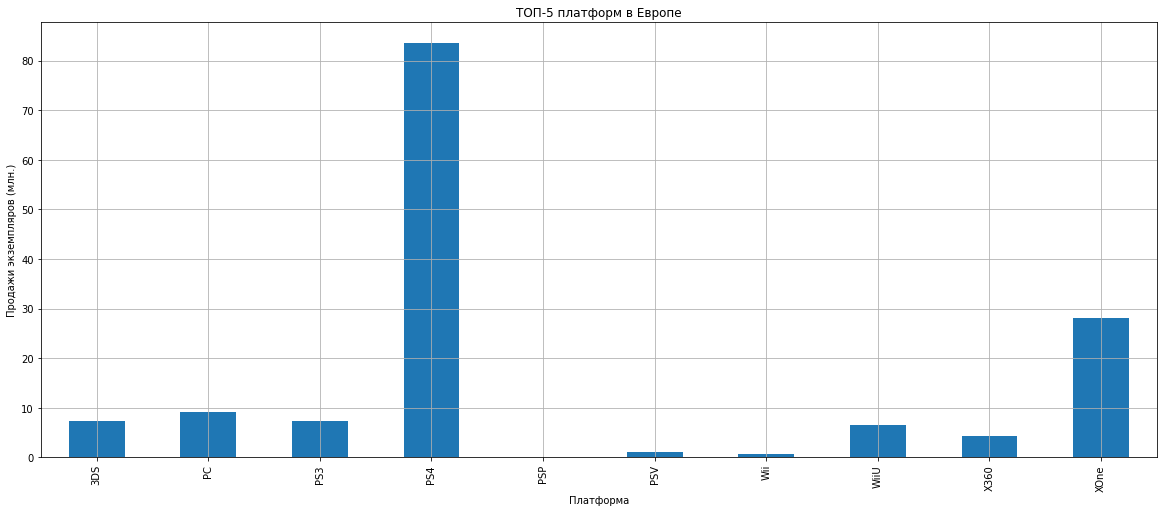

In [149]:
# ТОП-5 платформ в Европе
platform_eu = data_cut_2014.groupby("platform")["eu_sales"].sum()
platform_eu.plot(
    x="platform",
    y="eu_sales",
    kind="bar",
    figsize=(20, 8),
    grid=True,
    title="ТОП-5 платформ в Европе",
)
plt.xlabel("Платформа")
plt.ylabel("Продажи экземпляров (млн.)")
plt.show()

Топ-5 платформ в Европе - PS4, XOne, PC, 3DS, PS3. Видны явные различия с Америкой.

In [150]:
platform_all = data_cut_2014.groupby('platform')['total_sales'].sum()
share_eu = platform_eu / platform_all * 100
display('Доля продаж в Европе')
display(share_eu.sort_values(ascending=False))

'Доля продаж в Европе'

platform
PC      66.085694
Wii     55.303030
PS4     44.400744
PS3     35.749265
XOne    32.564608
X360    31.231454
WiiU    30.978520
3DS     17.218080
PSV     10.285714
PSP      0.000000
dtype: float64

На Европу приходится больше всего продаж игр на платформах PC, WiiUб PS4, PS3, ХOne.

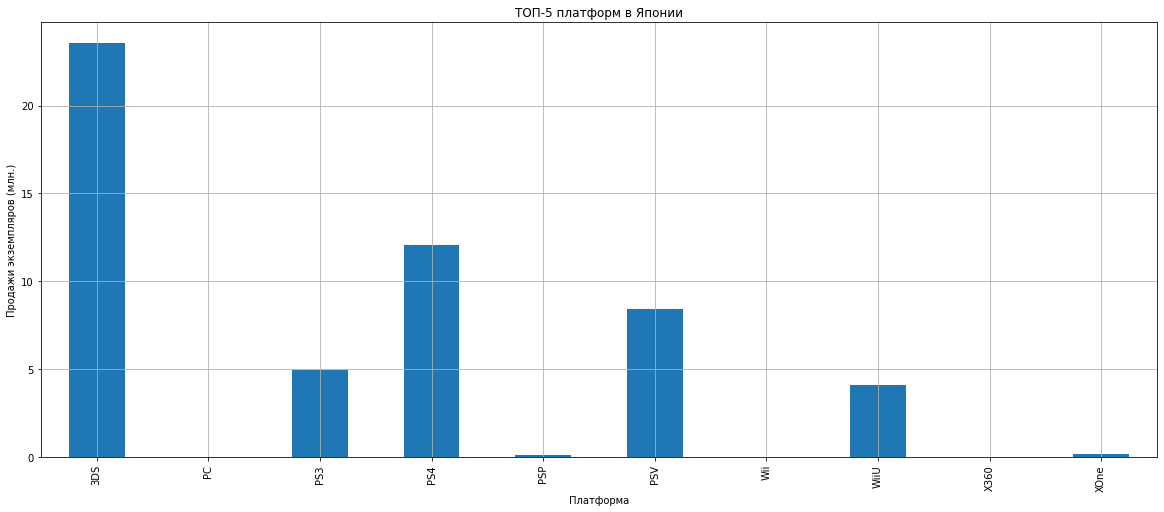

In [151]:
# ТОП-5 платформ в Японии
platform_jp = data_cut_2014.groupby("platform")["jp_sales"].sum()
platform_jp.plot(
    x="platform",
    y="jp_sales",
    kind="bar",
    figsize=(20, 8),
    grid=True,
    title="ТОП-5 платформ в Японии",
)
plt.xlabel("Платформа")
plt.ylabel("Продажи экземпляров (млн.)")
plt.show()

Топ-5 платформ в Японии - 3DS, PS4, PSV, PS3 и WiiU.

In [152]:
platform_all = data_cut_2014.groupby('platform')['total_sales'].sum()
share_jp = platform_jp / platform_all * 100
display('Доля продаж в Японии')
display(share_jp.sort_values(ascending=False))

'Доля продаж в Японии'

platform
PSP     100.000000
PSV      80.095238
3DS      54.869525
PS3      24.338883
WiiU     19.665871
PS4       6.404465
XOne      0.208599
PC        0.000000
Wii       0.000000
X360      0.000000
dtype: float64

На Японию приходится больше всего продаж игр на платформах PSP, PSV, 3DS, PS3 и WiiU.

In [153]:
#самые популярные жанры
#Северная Америка
na_index = data_cut_2014.groupby('genre')['na_sales'].sum().sort_values()[-5:].index.tolist()
na_values = data_cut_2014.groupby('genre')['na_sales'].sum().sort_values()[-5:]
#Европа
eu_index = data_cut_2014.groupby('genre')['eu_sales'].sum().sort_values()[-5:].index.tolist()
eu_values = data_cut_2014.groupby('genre')['eu_sales'].sum().sort_values()[-5:]
#Япония
jp_index = data_cut_2014.groupby('genre')['jp_sales'].sum().sort_values()[-5:].index.tolist()
jp_values = data_cut_2014.groupby('genre')['jp_sales'].sum().sort_values()[-5:]

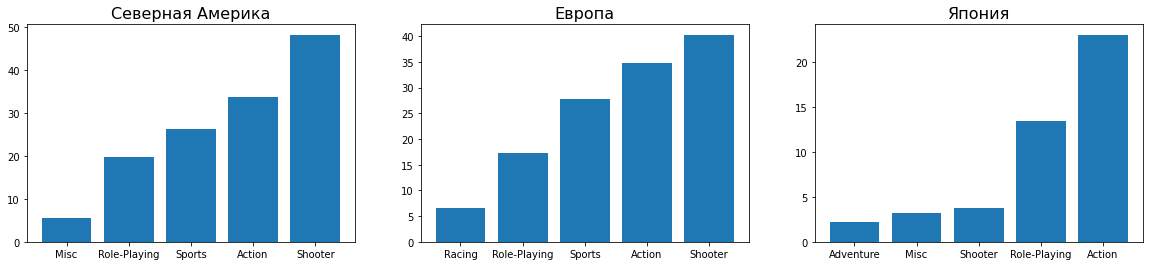

In [154]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))

ax1.bar(na_index, na_values)
ax1.set_title("Северная Америка", fontsize=16)

ax2.bar(eu_index, eu_values)
ax2.set_title("Европа", fontsize=16)

ax3.bar(jp_index, jp_values)
ax3.set_title("Япония", fontsize=16)

plt.show()

Во всех трех регионах в числе топ-5 есть игрф в жанре Role-Playing, Shooter и Action. При это для каждого региона есть свои особенности. Так, в Америке и Японии в топ попали игры в жанре "Misc", которых нет в Европе, но зато в Европе и Америке есть спортиыне игры,которых нет в Японии. При этом в самой японии есть в топе игры в жанре "Adventure", отсутсвующие в Европе и Америке.

*Влияет ли рейтинг ESRB на продажи в отдельном регионе?*

Entertainment Software Rating Board (ESRB) — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. 

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.

«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. 

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант.

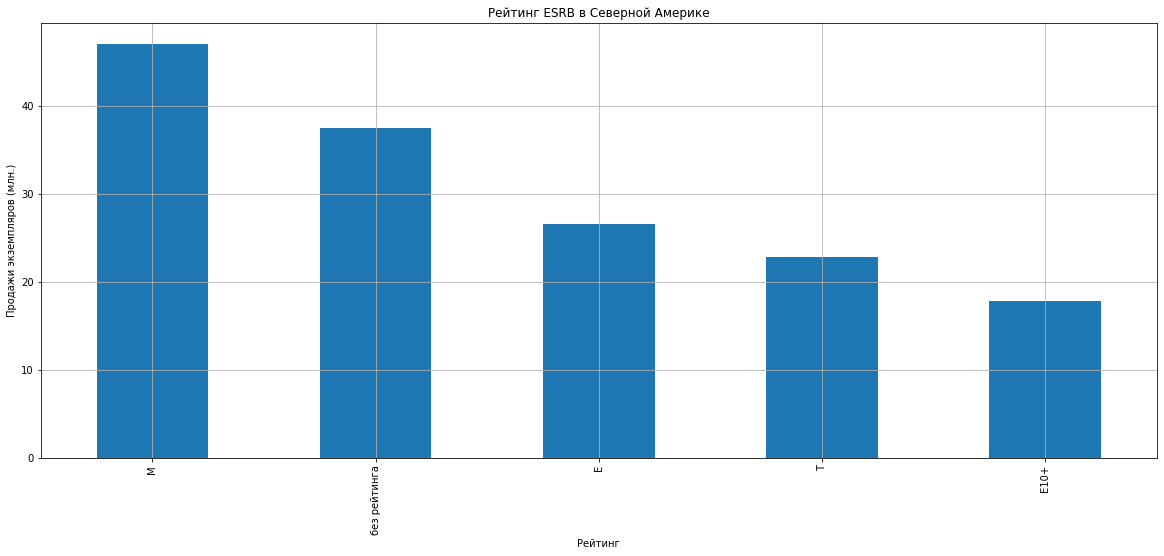

In [155]:
# рейтинг ESRB в Северной Америке
rating_na = (
    data_cut_2014.groupby("rating")["na_sales"].sum().sort_values(ascending=False)
)
rating_na.plot(
    x="rating",
    y="na_sales",
    kind="bar",
    figsize=(20, 8),
    grid=True,
    title="Рейтинг ESRB в Северной Америке",
)
plt.xlabel("Рейтинг")
plt.ylabel("Продажи экземпляров (млн.)")
plt.show()

Самые высокие рейтинги у рейтинга «Для лиц старше 17 лет», затем у неопределенного рейтинга, для всех,для подростков от 13 лет и замыкают пятерку игры для лиц старше 10 лет.

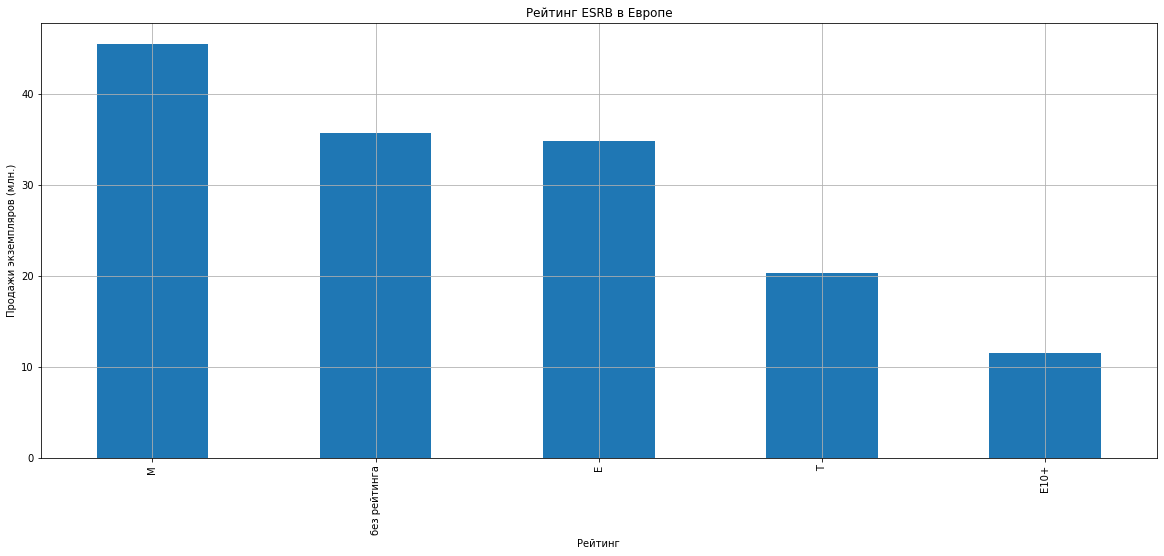

In [156]:
# рейтинг ESRB в Европе
rating_eu = data_cut_2014.groupby("rating")["eu_sales"].sum().sort_values(ascending=False)
rating_eu.plot(
    x="rating",
    y="eu_sales",
    kind="bar",
    figsize=(20, 8),
    grid=True,
    title="Рейтинг ESRB в Европе",
)
plt.xlabel("Рейтинг")
plt.ylabel("Продажи экземпляров (млн.)")
plt.show()

Европа совпадает с Америкой.

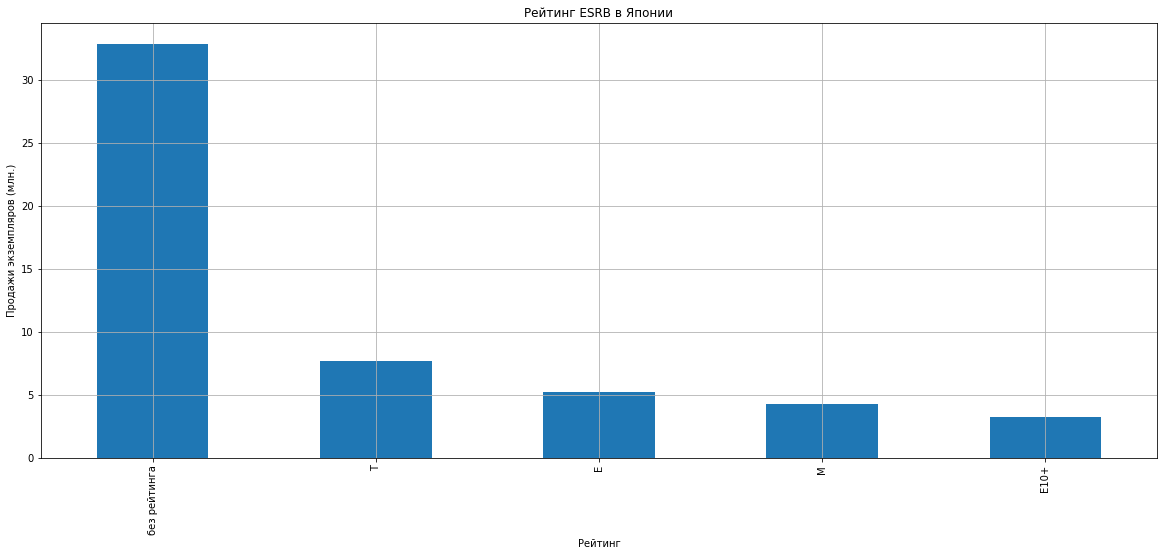

In [157]:
# рейтинг ESRB в Японии
rating_jp = data_cut_2014.groupby("rating")["jp_sales"].sum().sort_values(ascending=False)
rating_jp.plot(
    x="rating",
    y="jp_sales",
    kind="bar",
    figsize=(20, 8),
    grid=True,
    title="Рейтинг ESRB в Японии",
)
plt.xlabel("Рейтинг")
plt.ylabel("Продажи экземпляров (млн.)")
plt.show()

В целом, в топе в Японии те же 5 видов, однако лидирует со значительным отрывом игры без возрастного рейтинга. Благодаря поиску узнала, что в Японии присуждением рейтингов занимается внутренняя организация, предположу, что поэтому так много игр без рейтинга, а точнее, без рейтинга ESRB, а с внутренним, поскольку это игры местного производства в том числе.

Подводя краткий итог, в Северной Америке топ-5 платформ это - PS4, XOne, 3DS, WiiU и X360 и больше всего продаж игр на платформах  X360, XOne, WiiU, Wii, PS4..
В Европе топ-5 платформ это - PS4, XOne, PC, 3DS, PS3 и больше всего продаж игр на платформах PC, WiiUб PS4, PS3, ХOne.
В Японии топ-5 платформ это  - 3DS, PS4, PSV, PS3 и WiiU и больше всего продаж игр на платформах PSP, PSV, 3DS, PS3 и WiiU.
Во всех трех регионах в числе топ-5 есть игры в жанре Role-Playing, Shooter и Action. При этом для каждого региона есть свои особенности. Так, в Америке и Японии в топ попали игры в жанре "Misc", которых нет в Европе, но зато в Европе и Америке есть спортиыне игры,которых нет в Японии. При этом в самой Японии есть в топе игры в жанре "Adventure", отсутствующие в Европе и Америке.
По возрастному рейтингу во всех трех направлениях присутствуют возрастные рейтинги «Для всех», неопределенный рейтинг, подростки и люди старше 17 и игры для лиц старше 10 лет.
Однако у Европы и Америки лидирует "для лиц старше 17 лет", а у Японии - рейтинг неопределен, в связи с тем, что у них не рейтинг ESRB, а с внутренний, поскольку это игры местного производства в том числе.

# 4. Проверка гипотез.

*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.*

H0:средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H1:средние пользовательские рейтинги платформ Xbox One и PC разные.

In [158]:
#для удобства стоит создать новые датафреймы
data_xone = data_cut_2014[data_cut_2014['platform']=="XOne"]['user_score'].dropna()
data_pc = data_cut_2014[data_cut_2014['platform']=="PC"]['user_score'].dropna()

In [159]:
stat, p = levene(data_xone, data_pc)
p

0.07122249094391404

In [161]:
alpha = .05 

hip_1 = st.ttest_ind(
    data_xone, 
    data_pc,
    equal_var = True)

print('p-значение:', hip_1.pvalue)

if (hip_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


Получается, средняя оценка пользователей платформы XBox One не особо отличается от средней оценки пользователей платформы PC.

*Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

Н0: средние пользовательские рейтинги жанров Action и Sports разные;

Н1: средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [164]:
data_action = data_cut_2014[data_cut_2014['genre']=="Action"]['user_score'].dropna()
data_sports = data_cut_2014[data_cut_2014['genre']=="Sports"]['user_score'].dropna()

In [163]:
alpha = .05 

hip_2 = st.ttest_ind(
    data_action, 
    data_sports,
    equal_var = False)

print('p-значение:', hip_2.pvalue)

if (hip_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


Получается, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

# 5. Общий вывод.

В рамках данного исследования была проведена подготовка и предобработка данных: унифицированы столбцы, заменены Tbd на nan оценках пользователей, заменен тип данных году релиза, добавлен новый столбец по суммарным продажам. 

Был проведен исследовательский анализ, выявлено, что с 1994 г. начинается устойчивый рост количества выпускаемых игр. Вероятно, на это повлияло развитие компьютерной техники, а также приставок. Такой рост продолжался до 2008 г., продержался на том же уровне в 2009 г., и с 2010 начался спад, что в свою очередь, вероятно, связано с развитием смартфонов и индустрии мобильных игр. В относительно современное время, после 2014 г., наиболее продаваемые платформы это - PS2, X360, PS3, Wii, DS и PS, средняя жизнь платформы - 10 лет. Отметим, что при покупке, пользователи больше доверяют мнению критиков, чем таких же юзеров, как они сами, однако сильно на это не опираются. Самый популярный жанр - "Shooter", наименее популярны игры в жанре "Puzzle".

Также составлен небольшой пользовательский портрет: в Северной Америке топ-5 платформ это - PS4, XOne, 3DS, WiiU и X360 и больше всего продаж игр на платформах X360, XOne, WiiU, Wii, PS4. В Европе топ-5 платформ это - PS4, XOne, PC, 3DS, PS3 и больше всего продаж игр на платформах PC, WiiUб PS4, PS3, ХOne. В Японии топ-5 платформ это - 3DS, PS4, PSV, PS3 и WiiU и больше всего продаж игр на платформах PSP, PSV, 3DS, PS3 и WiiU. Во всех трех регионах в числе топ-5 есть игры в жанре Role-Playing, Shooter и Action. При этом для каждого региона есть свои особенности. Так, в Америке и Японии в топ попали игры в жанре "Misc", которых нет в Европе, но зато в Европе и Америке есть спортиыне игры,которых нет в Японии. При этом в самой Японии есть в топе игры в жанре "Adventure", отсутствующие в Европе и Америке. По возрастному рейтингу во всех трех направлениях присутствуют возрастные рейтинги «Для всех», неопределенный рейтинг, подростки и люди старше 17 и игры для лиц старше 10 лет. Однако у Европы и Америки лидирует "для лиц старше 17 лет", а у Японии - рейтинг неопределен, в связи с тем, что у них не рейтинг ESRB, а с внутренний, поскольку это игры местного производства в том числе.

И проверены две гипотезы:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза подтвердилась, средняя оценка пользователей платформы XBox One не отличается от средней оценки пользователей платформы PC.
Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза не подтвердилась, рейтинги примерно одинаковые.

# Для плана рекламной кампании компании "Стримчик"

Итак, для того, чтобы корректно понимать, как строить рекламную кампанию на предстояющий год, нужно учитывать несколько моментов.

Во-первых, согласно прогнозу, наиболее популярными будут PS4 и XOne, поэтому следует сосредоточиться именно на этих игровых платформах.

Во-вторых, крайне важен регион, в котором будет проводиться рекламная кампания.
Так, например, для Северной Америки стоит сделать акцент на шутеры, экшны, спортивные, ролевые и игры в жанре "Misc" преемущественно для возрастной категории старше 17 лет.
Для Европы стоит выбирать игры шутеры, экшны, спортивные, ролевые и гонки в основном также для 17+.
Для Японии нужно выбирать игры в жанрах экш, ролевые, шутеры, игры в жанре "Misc" и приключения, притом в категории "без рейтинга", то есть в основном японского же происхождения (аудитория предпочитает более бликие им сюжеты за счет отличия азиатской культуры от американской и европейской).

Обращать внимание на отзывы, пожалуй, бессмысленно, поскольку две платформы PS4 и XOne, которые будут популярны, и так на слуху и отзывы по ним не особо интересуют пользователей, а игры часто выбираются исходя из собсвенных интересов покупателя и желания продолжить интересные именно ему серии игр.